# Images segmentation using trained U-Net model

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Check if GPU is available

GPUs = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(GPUs))
for GPU in GPUs:
    tf.config.experimental.set_memory_growth(GPU, True)

Num GPUs Available:  1


In [3]:
# Load load the trained model

model = tf.keras.models.load_model('MODELS/CNN_MODEL_3_CP')

In [4]:
# Load the best model weights (If the saved model has different weights)

checkpoint_filepath = 'CHECKPOINT/MODEL_3'
model.load_weights(checkpoint_filepath)

In [5]:
# Test data generator

test_image_datagen = ImageDataGenerator(
    rescale = 1 / 255
)

test_masks_datagen = ImageDataGenerator()

In [6]:
# Parameterization of test data generators for 256x256 px images

TEST_IMAGES_PATH = 'TEST_SET_1_256/IMAGES'
TEST_MASKS_PATH = 'TEST_SET_1_256/MASKS'
IMG_SIZE = 256
BATCH_SIZE = 1
SEED_3 = 99

test_image_generator = test_image_datagen.flow_from_directory(
    directory = TEST_IMAGES_PATH,
    seed = SEED_3,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = None,
    color_mode = 'rgb',
    shuffle = False
)

test_mask_generator = test_masks_datagen.flow_from_directory(
    directory = TEST_MASKS_PATH,
    seed = SEED_3,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = None,
    color_mode = 'grayscale',
    shuffle = False
)

test_generator = zip(test_image_generator, test_mask_generator)

Found 70 images belonging to 1 classes.
Found 70 images belonging to 1 classes.


In [7]:
# Functions for:
#   - masks predicting: 
#     The model returns a list of the probability
#     of a given pixel belonging to each of the 5 classes
#     *Processing of any images that are multiples of 256x256 px is possible*
#
#   - masks creating:
#     Selecting the class to which the probability of belonging is the highest
#
#   - displaying results of predictions:

def predict_mask(images):
    MASK_SIZE = 256
    batch, img_height, img_width, depth = images.shape

    mask = np.empty((img_height, img_width, 1))
    for i in range(0, img_width, MASK_SIZE):
        for j in range(0, img_height, MASK_SIZE):
            img_patch = np.empty((1, MASK_SIZE, MASK_SIZE, depth))
            img_patch[0] = images[0][i : i + MASK_SIZE, j : j + MASK_SIZE]
            predicted_mask = model.predict(img_patch)
            predicted_mask = create_mask(predicted_mask)
            mask[i : i + MASK_SIZE, j : j + MASK_SIZE] = predicted_mask    
    return [mask]

def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis = -1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_predictions():
        image, mask = test_generator.__next__()
        predicted_mask = predict_mask(image)
        display([image[0], mask[0], predicted_mask[0]])

1/1 [==============================] - 0s 55ms/step


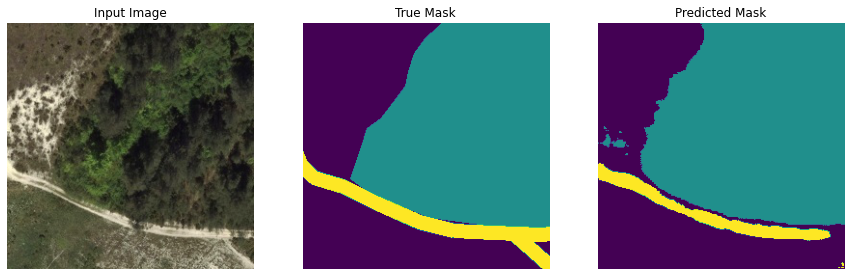

In [20]:
show_predictions()

In [21]:
# Parameterization of test data generators for 1024x1024 px images.
# Processing of any images that are multiples of 256x256 px is possible.
# Simply load the new generator parameters 
# and invoke show_predictions() function.

TEST_IMAGES_PATH = 'TEST_SET_2_1024/IMAGES'
TEST_MASKS_PATH = 'TEST_SET_2_1024/MASKS'
IMG_SIZE = 1024
BATCH_SIZE = 1
SEED_3 = 99

test_image_generator = test_image_datagen.flow_from_directory(
    directory = TEST_IMAGES_PATH,
    seed = SEED_3,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = None,
    color_mode = 'rgb',
    shuffle = False
)

test_mask_generator = test_masks_datagen.flow_from_directory(
    directory = TEST_MASKS_PATH,
    seed = SEED_3,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = None,
    color_mode = 'grayscale',
    shuffle = False
)

test_generator = zip(test_image_generator, test_mask_generator)

Found 56 images belonging to 1 classes.
Found 56 images belonging to 1 classes.


1/1 [==============================] - 0s 86ms/step


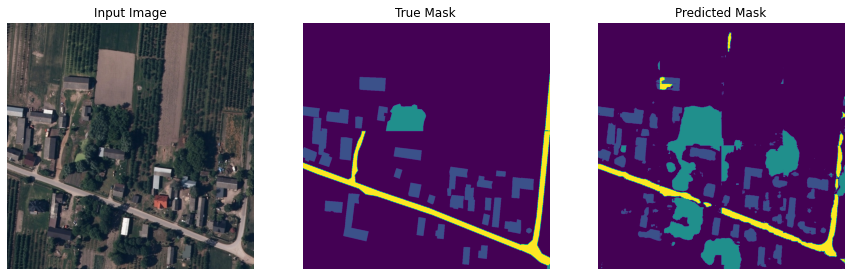

In [27]:
show_predictions()